In [1]:
import urllib.request
import os.path
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import gzip
import numpy as np
import pdb 


__file__ = 'perseptron/'
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}
dataset_dir = os.path.dirname(os.path.abspath(__file__))

def _download(filename):
    file_path = dataset_dir + '/' + filename
    if os.path.exists(file_path):
        return print('already exist')
    print('Downloading ' + filename + ' ...')
    urllib.request.urlretrieve(url_base + filename, file_path)
    print('Done')

def download_mnist():
    for v in key_file.values():
       _download(v)

#ALREADDY DOWNLOADED!!!
#download_mnist()

def load_mnist(filename, dat_size = 784, offset = 16):#dat means 'this'
    file_path = dataset_dir + '/' + filename
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset= offset)
    return data.reshape(-1, dat_size)


# For image Download, set offset to be 16, dat_size = 784
# For label Download, set offset to be 8, dat_size = 1
# img's dat_size is picture size 24*24 = 784
# label's data_size is list size (1)
# img's offset is 16 bits. because 8*2(=16) bits are required to express 2-dimention.
# label's offset is 8 bits. because 8 bits are required to express 1-dimention.

def readMNIST(filename): 
    data = None
    if filename == 'train_img':
        data = load_mnist(key_file['train_img'], dat_size = 784, offset=16)
    elif filename == 'train_label':
        data = load_mnist(key_file['train_label'], dat_size = 1, offset =8)
    elif filename == 'test_img':
        data = load_mnist(key_file['test_img'], dat_size = 784, offset=16)
    elif filename == 'test_label':
        data = load_mnist(key_file['test_label'], dat_size = 1, offset =8)
    else:
        raise NotImplementedError
    return data

In [2]:
imgTrain = readMNIST(filename = 'train_img')
labTrain = readMNIST(filename = 'train_label')
imgTest = readMNIST(filename = 'test_img')
labTest = readMNIST(filename = 'test_label')

[8]


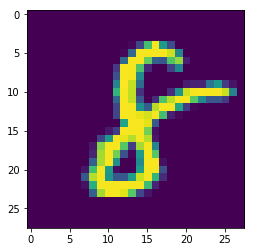

In [18]:
datIndex = 499
pic = imgTrain[datIndex].reshape(28, 28)

plt.imshow(pic)
print(labTrain[datIndex])
#print(labTrain[datIndex][0])

In [15]:
download_mnist()

already exist
already exist
Done
Done


In [11]:
#https://endoyuta.com/2017/01/12/python-mnistを使う/
#http://yann.lecun.com/exdb/mnist/